# Predictable End-of-Month Treasury Returns

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3440417

### Paper Abstract:

We document a distinct pattern in the timing of excess returns on coupon Treasury securities.
Average returns are positive and highly significant in the last few days of the month, and are
not significantly different from zero at other times. A long Treasury position for just the last
few days of each month gives a high annualized Sharpe ratio of around 1. We attribute this
pattern to temporary spikes in investor demand for specific securities due to window dressing
and portfolio rebalancing. We find evidence in quantities that aggregate insurer transactions
contribute to the end-of-month price pattern. In particular life insurers are large net buyers
of Treasury securities on benchmark index rebalancing dates. 

#### TDLR 
We should expect to seem some expliotable seasonality effect in end of month treasury bonds, which we can take advantage of

# Step 1. Download data and process data


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
def get_ticker(ticker_name):
    ticker= yf.Ticker(ticker_name)
    ticker_data = ticker.history(period="max")
    return ticker_data

In [3]:
def add_dates(ticker_data):
    ticker_data = ticker_data.reset_index()
    ticker_data["Year"] = ticker_data["Date"].dt.year
    ticker_data["Month"] = ticker_data["Date"].dt.month
    ticker_data["Day"] = ticker_data["Date"].dt.day
    return ticker_data

In [4]:
def get_and_process_ticker(ticker_name):
    ticker_data = get_ticker(ticker_name)
    ticker_data = add_dates(ticker_data)
    return ticker_data

In [5]:
hist = get_and_process_ticker("TLT")

Let's just check visualise there is no funny or funky business

<AxesSubplot:>

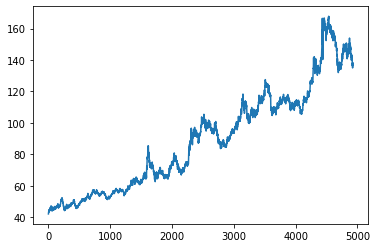

In [6]:
hist["Close"].plot()

We could of done the easy thing which is just doing date of month

In [7]:

hist["DayOfMonth"] = hist.groupby(["Month","Year"])["Day"].rank()

In [13]:

hist["ReversedDayOfMonth"] = hist.groupby(["Month","Year"])["Day"].rank(ascending=False)

# Step 2. Data analysis

Log returns so we can add over time 

In [15]:
hist["log_returns"] = np.log(hist["Close"]/hist["Close"].shift(1))


<AxesSubplot:xlabel='DayOfMonth'>

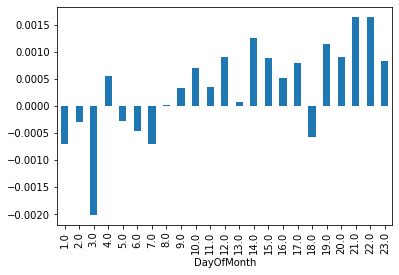

In [16]:
hist.groupby("DayOfMonth")["log_returns"].mean().plot.bar()

<AxesSubplot:xlabel='ReversedDayOfMonth'>

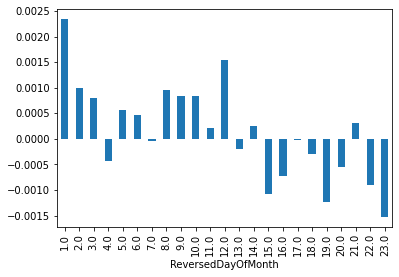

In [17]:
hist.groupby("ReversedDayOfMonth")["log_returns"].mean().plot.bar()

<AxesSubplot:xlabel='DayOfMonth'>

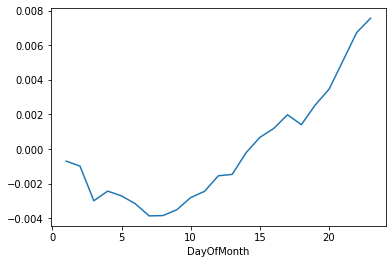

In [10]:
hist.groupby("DayOfMonth").mean()["log_returns"].cumsum().plot()


<AxesSubplot:xlabel='ReversedDayOfMonth'>

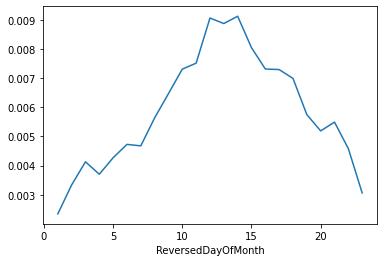

In [18]:
hist.groupby("ReversedDayOfMonth").mean()["log_returns"].cumsum().plot()


This shows us a steady decrease in the first couple days of the month spiking at the end of the month, this is consistent with what the paper has said. Let's plot it over a couple of years to check




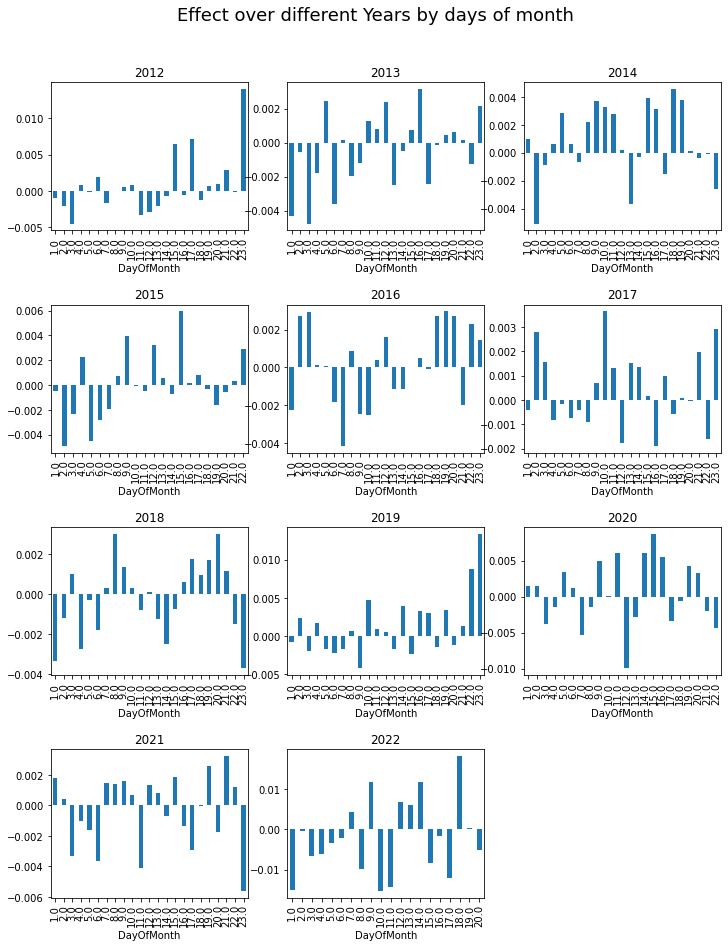

In [380]:
years_list = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Effect over different Years by days of month", fontsize=18, y=0.95)

# loop through tickers and axes
for i, ax in zip(years_list, axs.ravel()):
    # filter df for ticker and plot on specified axes
    hist[hist.Year == i].groupby("DayOfMonth")["log_returns"].mean().plot.bar(ax=ax)
    ax.set_title(i)
    
fig.delaxes(axs[3][2])
    
plt.show()

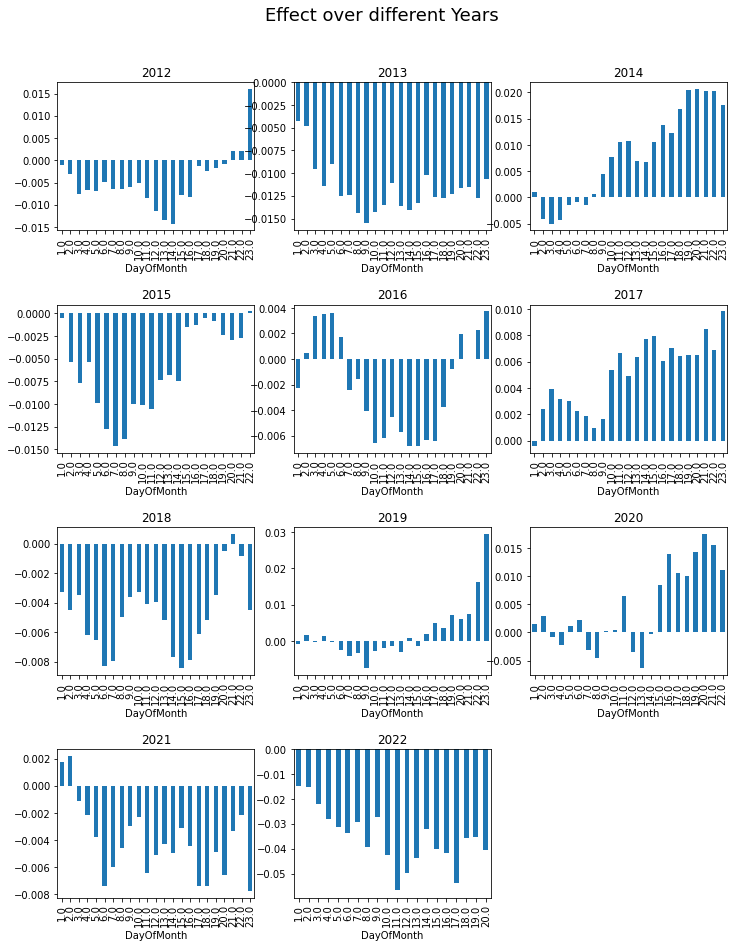

In [381]:
years_list = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Effect over different Years", fontsize=18, y=0.95)

# loop through tickers and axes
for i, ax in zip(years_list, axs.ravel()):
    # filter df for ticker and plot on specified axes
    hist[hist.Year == i].groupby("DayOfMonth")["log_returns"].mean().cumsum().plot.bar(ax=ax)
    ax.set_title(i)
    
fig.delaxes(axs[3][2])
    
plt.show()

Potentially this means we can go short the first couple of days in a month then go long the next couple of days.

<AxesSubplot:xlabel='Year'>

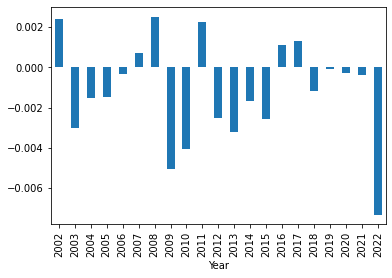

In [385]:
hist[hist["DayOfMonth"] < 4].groupby("Year").mean()["log_returns"].plot.bar()

In [383]:
hist[hist["DayOfMonth"] < 5].groupby("Year").mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Month,Day,DayOfMonth,log_returns
Year,,,,,,,,,,,
2002,44.732027,44.978655,44.542973,44.824875,1.408864e+05,0.067909,0.0,9.727273,6.045455,2.409091,0.001337
2003,47.222050,47.399825,46.978411,47.178086,6.311188e+05,0.086104,0.0,6.500000,3.645833,2.500000,-0.001649
2004,48.862120,48.990019,48.679185,48.837041,1.141583e+06,0.079312,0.0,6.500000,3.479167,2.500000,-0.001087
2005,54.557179,54.722334,54.359182,54.516623,1.400367e+06,0.079083,0.0,6.500000,3.479167,2.500000,-0.000459
2006,54.721725,54.879745,54.579364,54.752867,1.142962e+06,0.076896,0.0,6.500000,3.666667,2.500000,-0.000362
2007,57.928376,58.125468,57.740424,57.926407,1.359704e+06,0.079792,0.0,6.500000,3.750000,2.500000,0.000492
2008,64.860779,65.271196,64.480854,64.924219,2.534158e+06,0.078438,0.0,6.500000,3.562500,2.500000,0.002568
2009,70.328377,70.715091,69.730362,70.148956,3.566031e+06,0.069187,0.0,6.500000,3.500000,2.500000,-0.004260
2010,71.412576,71.831580,71.012766,71.377950,7.076362e+06,0.075000,0.0,6.500000,3.541667,2.500000,-0.000144


Let's take a look by year on average how this effect plays out. It's still noisy but we can see an effect appearing on average each year. 

<AxesSubplot:xlabel='Year'>

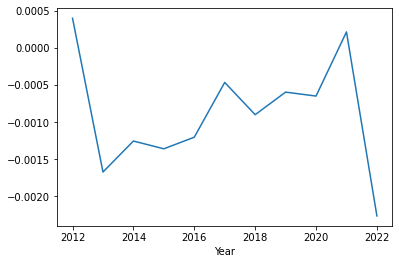

In [234]:
(hist[hist["DayOfMonth"] < 4].groupby("Year").mean()["log_returns"]).plot()

Let's make sure that by going short we aren't taking outsized risk by doing so. 

<AxesSubplot:xlabel='DayOfMonth'>

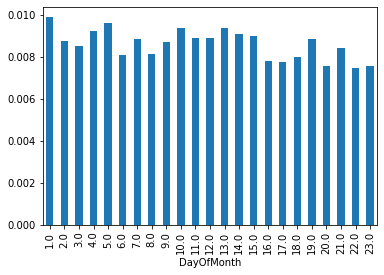

In [391]:
hist.groupby(["DayOfMonth"])["log_returns"].std().plot.bar()

Even thought the first couple days are quite voltile it doesn't seem like we are taking that much extra risk proxied by volatility.

Let's take a look at the first couple of days

<AxesSubplot:xlabel='Year'>

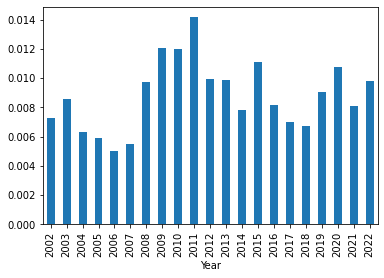

In [127]:
hist[hist["DayOfMonth"] < 4].groupby("Year").std()["log_returns"].plot.bar()

<AxesSubplot:>

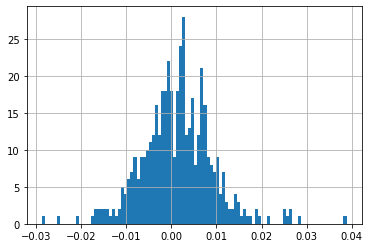

In [392]:
hist[hist["DayOfMonth"] > 19]["log_returns"].hist(bins=100)

<AxesSubplot:>

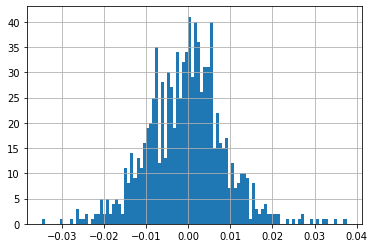

In [393]:
hist[hist["DayOfMonth"] < 5]["log_returns"].hist(bins=100)

# 3. Basic Strategy

In [400]:
hist = hist.set_index("Date")

In [401]:
hist["long_signal"] = np.where(hist["DayOfMonth"] > 4,1,0)
hist["short_signal"] = np.where(hist["DayOfMonth"] < 4,-1,0)

<AxesSubplot:xlabel='Date'>

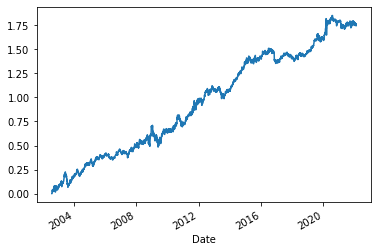

In [402]:
(hist["long_signal"]*hist["log_returns"]).cumsum().plot()

<AxesSubplot:xlabel='Date'>

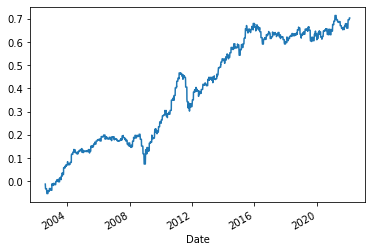

In [403]:
(hist["short_signal"]*hist["log_returns"]).cumsum().plot()

<AxesSubplot:xlabel='Date'>

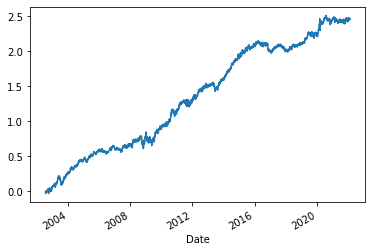

In [404]:
hist["total_strategy_return"] = (hist["short_signal"]*hist["log_returns"])+(hist["long_signal"]*hist["log_returns"])
(hist["total_strategy_return"]).cumsum().plot()

# Calculating vectorised summary statistics 

### Let's calculate Sharpe

And overall Sharpe by year

In [408]:
hist["total_strategy_return"].mean()/hist["total_strategy_return"].std()*np.sqrt(252)


0.9346166769087838

In [421]:
(hist.groupby("Year").mean()/hist.groupby("Year").std())["total_strategy_return"]*np.sqrt(252)

Year
2002    0.719061
2003    1.685606
2004    1.970778
2005    1.766072
2006    0.518997
2007    0.501204
2008    0.465183
2009    0.771844
2010    1.594981
2011    0.799724
2012    1.427668
2013    0.860394
2014    3.428562
2015    0.909547
2016   -0.557044
2017    0.029912
2018    1.110253
2019    0.999194
2020    0.964550
2021   -0.061207
2022    1.777355
Name: total_strategy_return, dtype: float64

### Lets calculate total returns

In [412]:
hist.groupby("Year").sum()["total_strategy_return"]

Year
2002    0.038197
2003    0.203546
2004    0.191251
2005    0.158202
2006    0.036906
2007    0.047803
2008    0.078481
2009    0.139989
2010    0.239861
2011    0.156655
2012    0.194565
2013    0.108386
2014    0.353821
2015    0.138925
2016   -0.071240
2017    0.002830
2018    0.100392
2019    0.117363
2020    0.203728
2021   -0.008283
2022    0.032208
Name: total_strategy_return, dtype: float64

# Let's look at some additional instruments

In [194]:
hist = get_and_process_ticker("VAF.AX")

In [195]:
hist["DayOfMonth"] = hist.groupby(["Month","Year"])["Day"].rank()

In [422]:
hist["log_returns"] = np.log(hist["Close"]/hist["Close"].shift(1))

<AxesSubplot:xlabel='DayOfMonth'>

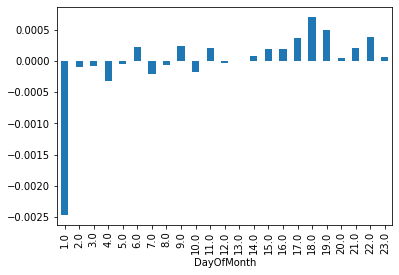

In [197]:
hist.groupby("DayOfMonth")["log_returns"].mean().plot.bar()

<AxesSubplot:xlabel='DayOfMonth'>

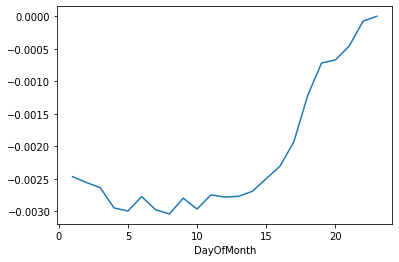

In [198]:
hist.groupby("DayOfMonth")["log_returns"].mean().cumsum().plot()

<AxesSubplot:xlabel='DayOfMonth'>

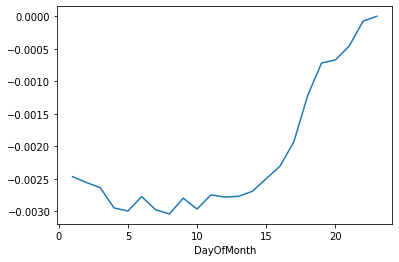

In [239]:
(hist.groupby("DayOfMonth")["log_returns"].mean()).cumsum().plot()

# Let's take a look at IEF

In [346]:
hist = get_and_process_ticker("IEF")

In [347]:
#We could of done the easy thing which is just doing date
hist["DayOfMonth"] = hist.groupby(["Month","Year"])["Day"].rank()

In [348]:
#Log returns we can add over time 
hist["log_returns"] = np.log(hist["Close"]/hist["Close"].shift(1))


<AxesSubplot:xlabel='DayOfMonth'>

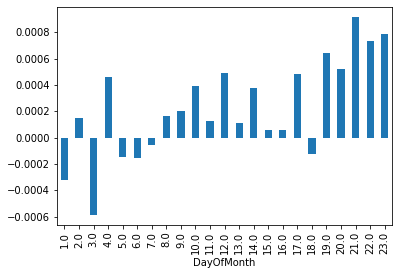

In [349]:
hist.groupby("DayOfMonth")["log_returns"].mean().plot.bar()